# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [12]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite, Joint, NormalPdf, MakeNormalPmf, EvalPoissonPmf

import thinkplot
import numpy as np

In [5]:
class battleship(Suite, Joint):
    def __init__(self, xs, ys, lam):
        self.lam = lam
        pairs = [(x, y)
                for x in xs
                for y in ys]
        Suite.__init__(self, pairs)
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: a tuple containing the coordinates (also a tuple) and hit or miss
        hypo: x,y coordinate where the ship could be
        """
        coord, result = data
        fired = np.array(coord)
        h_coord = np.array(hypo)
        
        d = np.linalg.norm(h_coord - fired)
        
        like = np.exp(-d*self.lam)
        if result == 'H':
            return like
        else:
            return 1 - like

No handles with labels found to put in legend.


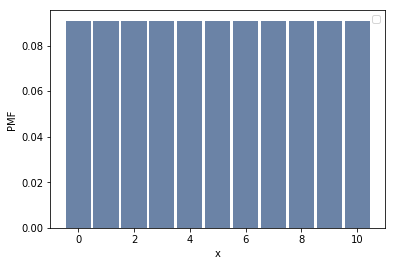

In [14]:
xs = range(0, 11)
ys = range(0, 11)
lam = 1
prior = battleship(xs, ys, lam)
prior_marginal_x = prior.Marginal(0)
prior_marginal_y = prior.Marginal(1)
thinkplot.Hist(prior_marginal_x)
thinkplot.Config(xlabel='x', ylabel='PMF')

No handles with labels found to put in legend.


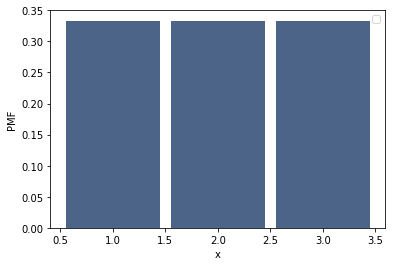

In [10]:
posterior = prior.Copy()
posterior.Update(1)
thinkplot.Hist(prior, color='gray')
thinkplot.Hist(posterior)
thinkplot.Config(xlabel='x', ylabel='PMF')

0.11021072762902315

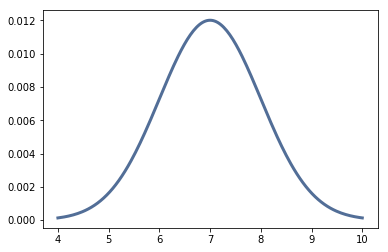

In [13]:
train_time = MakeNormalPmf(7, 1, 3)
thinkplot.plot(train_time)
total = 0
for t, p in train_time.Items():
    total += p * EvalPoissonPmf(10, 1.3*t)
total